In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Root Mean Square Percentage Error (RMSPE)
def calculate_accuracy(real, predict):
    real = np.array(real)
    predict = np.array(predict)
    percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))
    return percentage * 100

test_size = 30

In [4]:
results = np.load('goog_lstm.npy')
results2 = np.load('goog_lstm_bid.npy')
results3 = np.load('goog_lstm_2p.npy')
results4 = np.load('goog_gru.npy')
results5 = np.load('goog_gru_bid.npy')
results6 = np.load('goog_gru_2p.npy')
results7 = np.load('goog_vrnn.npy')
results8 = np.load('goog_vrnn_bid.npy')
results9 = np.load('goog_vrnn_2p.npy')
results10 = np.load('goog_seq2seq.npy')
results11 = np.load('goog_seq2seq_bid.npy')
results12 = np.load('goog_seq2seq_vae.npy')
results13 = np.load('goog_gru_seq2seq.npy')
results14 = np.load('goog_grubid_seq2seq.npy')
results15 = np.load('goog_gruvae_seq2seq.npy')
df = np.load('goog.npy')
df = pd.DataFrame(data=df, columns=["4. close"])

In [5]:
a1 = np.mean(results, axis=0)
a2 = np.mean(results2, axis=0)
a3 = np.mean(results3, axis=0)
a4 = np.mean(results4, axis=0)
a5 = np.mean(results5, axis=0)
a6 = np.mean(results6, axis=0)
a7 = np.mean(results7, axis=0)
a8 = np.mean(results8, axis=0)
a9 = np.mean(results9, axis=0)
a10 = np.mean(results10, axis=0)
a11 = np.mean(results11, axis=0)
a12 = np.mean(results12, axis=0)
a13 = np.mean(results13, axis=0)
a14 = np.mean(results14, axis=0)
a15 = np.mean(results15, axis=0)
a = [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15]

In [6]:
best1 = results[4]
best2 = results2[4]
best3 = results3[4]
best4 = results4[4]
best5 = results5[4]
best6 = results6[4]
best7 = results7[4]
best8 = results8[4]
best9 = results9[4]
best10 = results10[4]
best11 = results11[4]
best12 = results12[4]
best13 = results13[4]
best14 = results14[4]
best15 = results15[4]

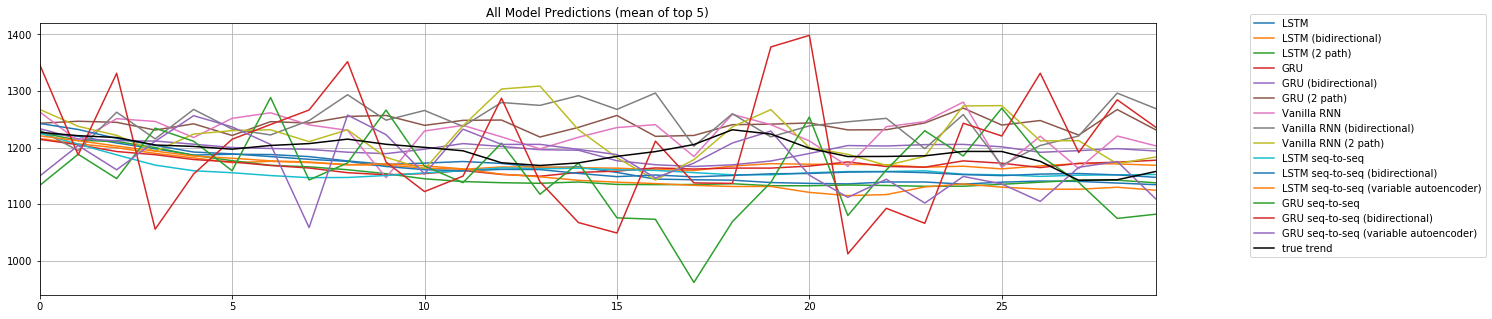

[96.75573771335986, 97.59599106589592, 96.03319497339568, 97.25627965675857, 97.8026086476173, 95.46593044722378, 96.3786815005637, 94.24740293189443, 95.76634321445468, 96.71070636003222, 97.19303067127991, 96.02362954739606, 93.31383649939576, 91.42108858739225, 95.71870488231717]


In [7]:
overall = [calculate_accuracy(df['4. close'].iloc[-test_size:].values, r) for r in a]
plt.figure(figsize = (20, 5))
plt.plot(a1, label = 'LSTM')
plt.plot(a2, label = 'LSTM (bidirectional)')
plt.plot(a3, label = 'LSTM (2 path)')
plt.plot(a4, label = 'GRU')
plt.plot(a5, label = 'GRU (bidirectional)')
plt.plot(a6, label = 'GRU (2 path)')
plt.plot(a7, label = 'Vanilla RNN')
plt.plot(a8, label = 'Vanilla RNN (bidirectional)')
plt.plot(a9, label = 'Vanilla RNN (2 path)')
plt.plot(a10, label = 'LSTM seq-to-seq')
plt.plot(a11, label = 'LSTM seq-to-seq (bidirectional)')
plt.plot(a12, label = 'LSTM seq-to-seq (variable autoencoder)')
plt.plot(a13, label = 'GRU seq-to-seq')
plt.plot(a14, label = 'GRU seq-to-seq (bidirectional)')
plt.plot(a15, label = 'GRU seq-to-seq (variable autoencoder)')
plt.plot(df['4. close'].iloc[-test_size:].values, label = 'true trend', c = 'black')
plt.legend(loc= 'upper right', bbox_to_anchor=(1.3, 1.05))
plt.title('All Model Predictions (mean of top 5)')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.show()
print(overall)

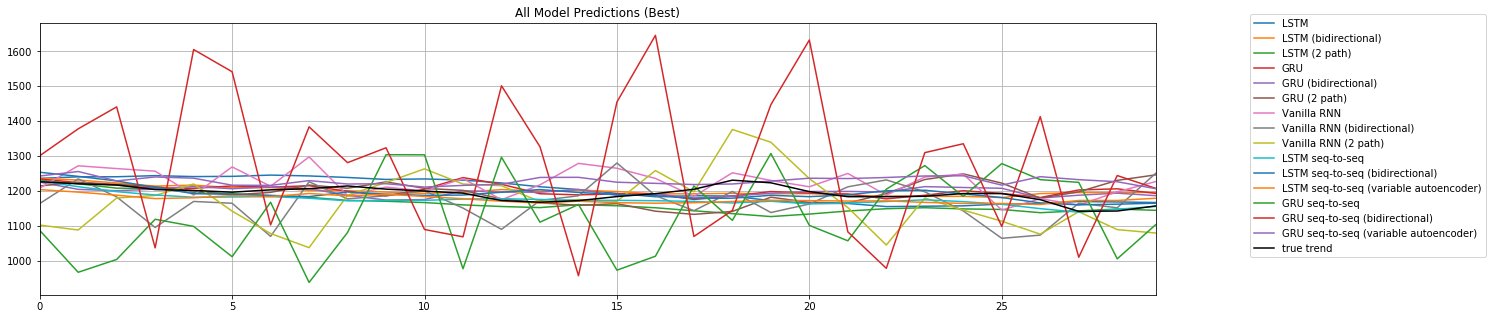

In [8]:
plt.figure(figsize = (20, 5))
plt.plot(best1, label = 'LSTM')
plt.plot(best2, label = 'LSTM (bidirectional)')
plt.plot(best3, label = 'LSTM (2 path)')
plt.plot(best4, label = 'GRU')
plt.plot(best5, label = 'GRU (bidirectional)')
plt.plot(best6, label = 'GRU (2 path)')
plt.plot(best7, label = 'Vanilla RNN')
plt.plot(best8, label = 'Vanilla RNN (bidirectional)')
plt.plot(best9, label = 'Vanilla RNN (2 path)')
plt.plot(best10, label = 'LSTM seq-to-seq')
plt.plot(best11, label = 'LSTM seq-to-seq (bidirectional)')
plt.plot(best12, label = 'LSTM seq-to-seq (variable autoencoder)')
plt.plot(best13, label = 'GRU seq-to-seq')
plt.plot(best14, label = 'GRU seq-to-seq (bidirectional)')
plt.plot(best15, label = 'GRU seq-to-seq (variable autoencoder)')
plt.plot(df['4. close'].iloc[-test_size:].values, label = 'true trend', c = 'black')
plt.legend(loc= 'upper right', bbox_to_anchor=(1.3, 1.05))
plt.title('All Model Predictions (Best)')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.show()

In [9]:
def trend_classifier(test_pred, test_labels, test_size):
    classification = np.zeros(test_size)
    class_labels = np.zeros(test_size)
    for i in range(test_size):
        c = np.sign(test_labels.iloc[-test_size:].values[i] - test_labels.iloc[-(test_size + 1):].values[i])
        if i == 0:
            b = np.sign(test_pred[i] - test_labels.iloc[-(test_size + 1):].values[i])
        else:
            b = np.sign(test_pred[i] - test_pred[i-1])
        
        class_labels[i] = c
        classification[i] = b
        
    x = np.arange(0, test_size, 1)
    plt.ylabel('Overall Trend')
    plt.autoscale(axis='x', tight=True)
    plt.plot(x,class_labels, label='Actual Price Trend')
    plt.plot(x,classification, label='Predicted Price Trend')
    plt.legend()
    plt.show()
    trend = (np.count_nonzero(class_labels == classification)/test_size) * 100
    return trend

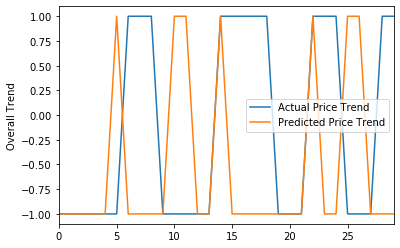

46.666666666666664

In [10]:
trend_classifier(a1, df['4. close'], test_size)

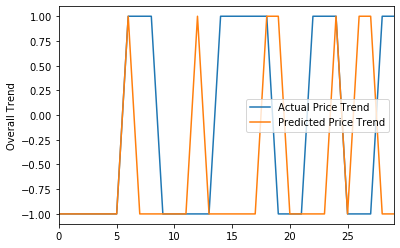

53.333333333333336

In [11]:
trend_classifier(a2, df['4. close'], test_size)

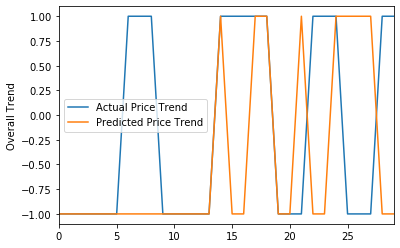

56.666666666666664

In [12]:
trend_classifier(a3, df['4. close'], test_size)

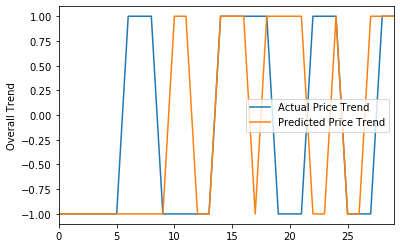

60.0

In [13]:
trend_classifier(a4, df['4. close'], test_size)

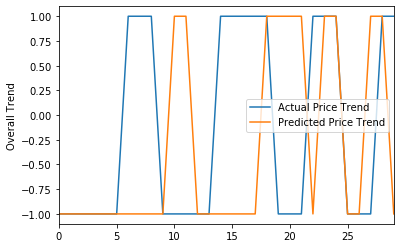

50.0

In [14]:
trend_classifier(a5, df['4. close'], test_size)

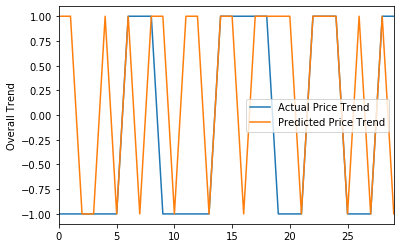

60.0

In [15]:
trend_classifier(a6, df['4. close'], test_size)

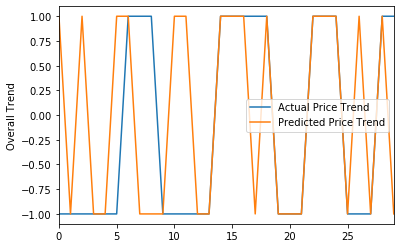

66.66666666666666

In [16]:
trend_classifier(a7, df['4. close'], test_size)

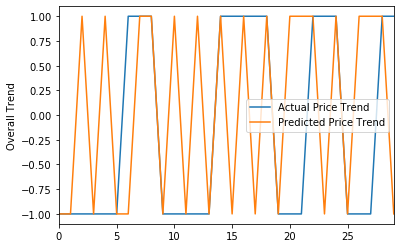

56.666666666666664

In [17]:
trend_classifier(a8, df['4. close'], test_size)

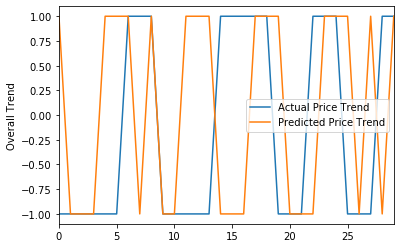

50.0

In [18]:
trend_classifier(a9, df['4. close'], test_size)

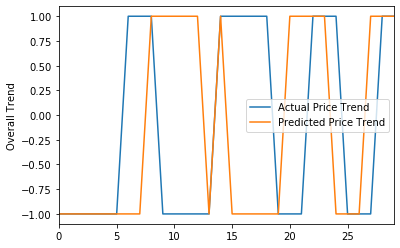

53.333333333333336

In [19]:
trend_classifier(a10, df['4. close'], test_size)

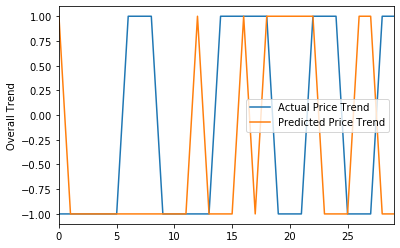

43.333333333333336

In [20]:
trend_classifier(a11, df['4. close'], test_size)

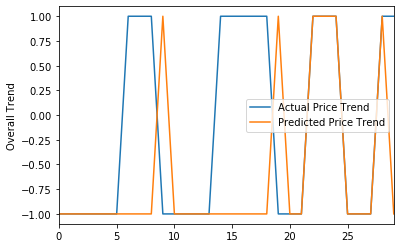

63.33333333333333

In [21]:
trend_classifier(a12, df['4. close'], test_size)

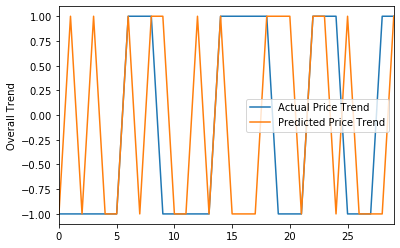

56.666666666666664

In [22]:
trend_classifier(a13, df['4. close'], test_size)

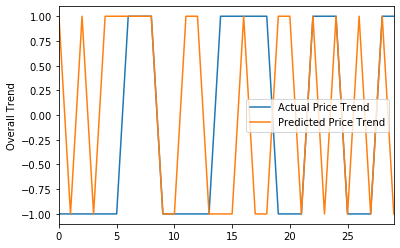

50.0

In [23]:
trend_classifier(a14, df['4. close'], test_size)

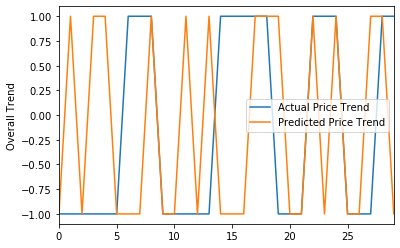

53.333333333333336

In [24]:
trend_classifier(a15, df['4. close'], test_size)

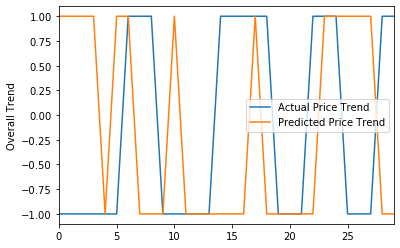

40.0

In [25]:
trend_classifier(best1, df['4. close'], test_size)

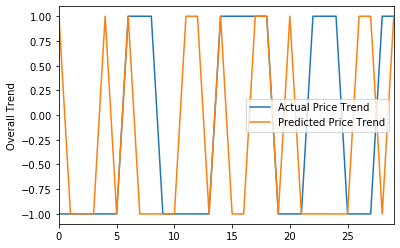

50.0

In [26]:
trend_classifier(best2, df['4. close'], test_size)

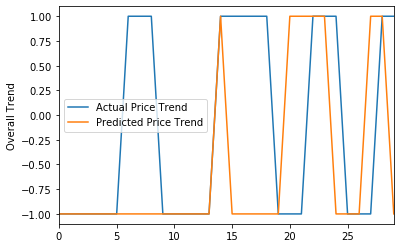

60.0

In [27]:
trend_classifier(best3, df['4. close'], test_size)

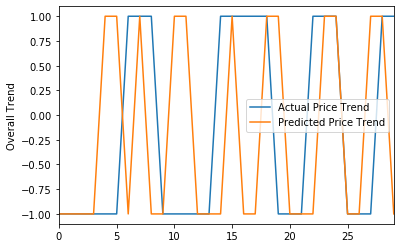

56.666666666666664

In [28]:
trend_classifier(best4, df['4. close'], test_size)

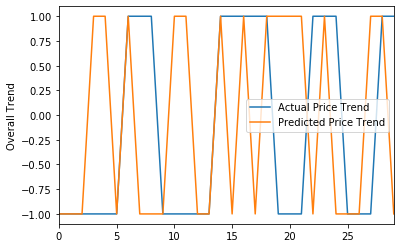

50.0

In [29]:
trend_classifier(best5, df['4. close'], test_size)

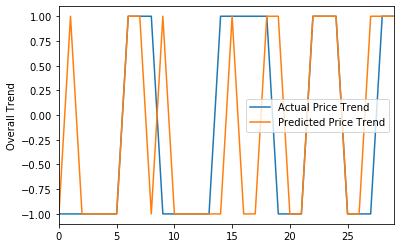

73.33333333333333

In [30]:
trend_classifier(best6, df['4. close'], test_size)

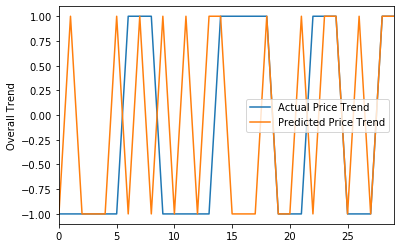

56.666666666666664

In [31]:
trend_classifier(best7, df['4. close'], test_size)

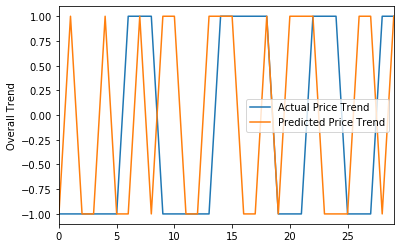

46.666666666666664

In [32]:
trend_classifier(best8, df['4. close'], test_size)

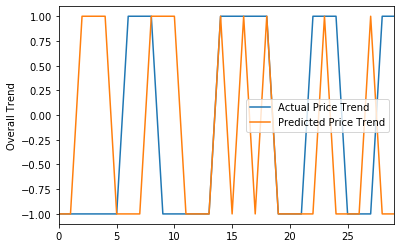

53.333333333333336

In [33]:
trend_classifier(best9, df['4. close'], test_size)

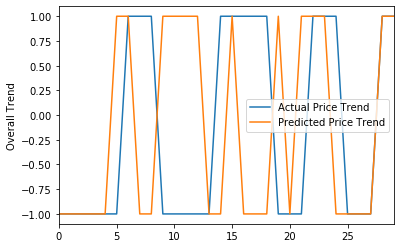

53.333333333333336

In [34]:
trend_classifier(best10, df['4. close'], test_size)

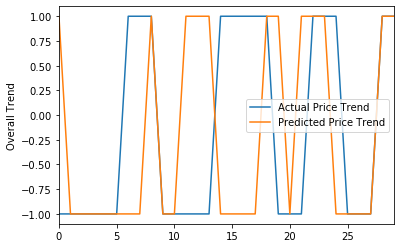

56.666666666666664

In [35]:
trend_classifier(best11, df['4. close'], test_size)

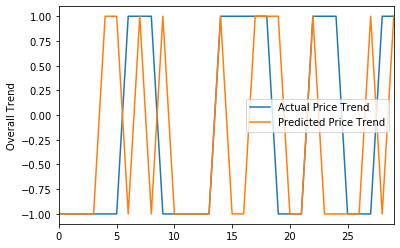

60.0

In [36]:
trend_classifier(best12, df['4. close'], test_size)

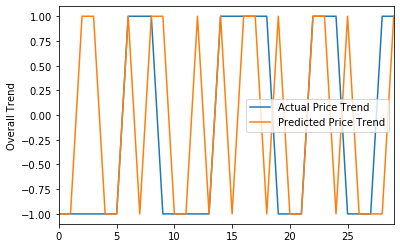

63.33333333333333

In [37]:
trend_classifier(best13, df['4. close'], test_size)

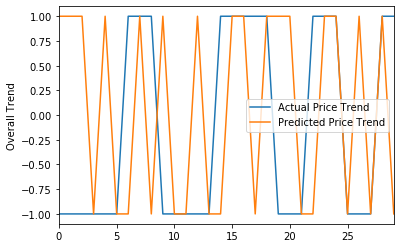

50.0

In [38]:
trend_classifier(best14, df['4. close'], test_size)

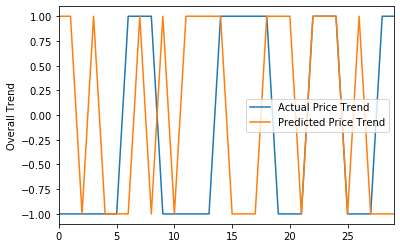

43.333333333333336

In [39]:
trend_classifier(best15, df['4. close'], test_size)